In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import vgg19
from tensorflow.keras.preprocessing import image as keras_image
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

'''tensorflow:-  It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.'''
'''neural network:- method in artificial intelligence that teaches computers to process data in a way that is inspired by the human brain.'''
'''VGG-19 is a convolutional neural network (CNN).VGG-19 has 19 layers, including 16 convolutional layers and 3 fully connected layers'''

In [53]:

def load_and_preprocess_image(image_path, img_height, img_width):
 img = keras_image.load_img(image_path, target_size=(img_height, img_width))
 img = keras_image.img_to_array(img)
 img = np.expand_dims(img, axis=0)
 img = vgg19.preprocess_input(img)
 return img

In [54]:

def tensor_to_image(tensor):
 tensor = tensor * 255
 tensor = np.clip(tensor, 0, 255).astype('uint8')
 return tensor[0]


In [55]:

style_image_path = r'base.jpg'
content_image_path = r'nature.jpg'

img_height = 400
img_width = 400

In [56]:
# Load style and content images
style_image = load_and_preprocess_image(style_image_path, img_height, img_width)
content_image = load_and_preprocess_image(content_image_path, img_height, img_width)
import tensorflow as tf
def style_loss(style_targets, style_outputs):
 loss = tf.zeros(shape=()) 
 num_layers = len(style_targets) 
 for i in range(num_layers):
  target_features = style_targets[i]
  output_features = style_outputs[i]

  target_gram_matrix = gram_matrix(target_features)
  output_gram_matrix = gram_matrix(output_features) #Gram matrices are calculated from style feature maps captured by inputting style and generated images. '''

  layer_loss = tf.reduce_mean(tf.square(target_gram_matrix - output_gram_matrix)) #The difference between the Gram matrices becomes style loss.


  loss += layer_loss


 total_loss = loss / float(num_layers)
 '''Total Loss:
Total loss is the linear combination of style and content loss we defined above:
L(total) = α * L_style + beta * L_content

Where α and β are the weighting factors for content and style reconstruction, respectively.'''

 return total_loss

In [57]:
def gram_matrix(tensor):
 batch_size, height, width, channels = tensor.get_shape().as_list()

 
 reshaped_tensor = tf.reshape(tensor, [batch_size * height * width, channels])


 gram = tf.matmul(reshaped_tensor, reshaped_tensor, transpose_a=True)

 num_elements = tf.cast(batch_size * height * width * channels, tf.float32)
 gram /= num_elements

 return gram


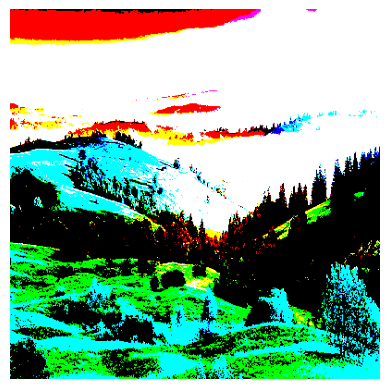

In [58]:

generated_image = tf.Variable(content_image, dtype=tf.float32)

optimizer = tf.optimizers.Adam(learning_rate=0.1, beta_1=0.99, epsilon=1e-1)

final_image = tensor_to_image(generated_image.numpy())

plt.imshow(final_image)
plt.axis('off')
plt.show()


In [ ]:
'''NST is a technique in deep learning that combines the content of one image with the artistic style of another.
It uses pre-trained convolutional neural networks to generate images that exhibit the content of one image and the style of another.'''

'''NST optimizes a generated image to minimize both content loss (capturing content similarity with the content image) and style loss (capturing style similarity with the style image). 
These losses guide the optimization process to create a visually appealing output.'''